<a href="https://colab.research.google.com/github/aditisingh2912/Intro-to-CV/blob/main/OpenCV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

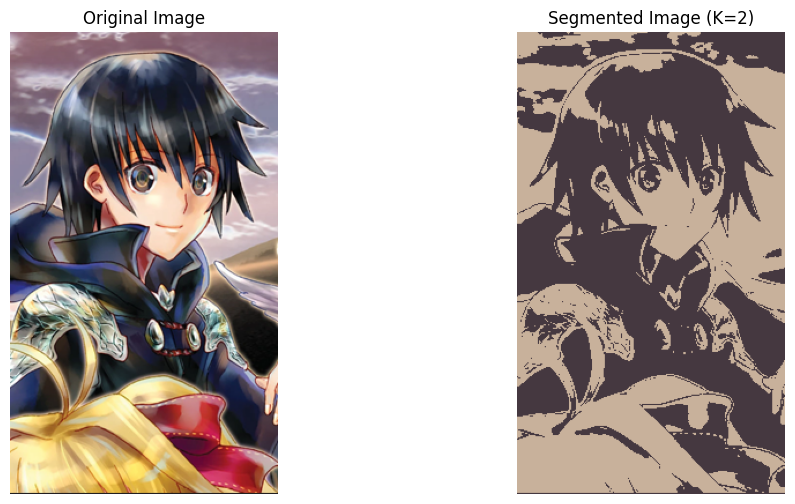

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/sato.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

pixels = image.reshape((-1, 3))

K = 2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(np.float32(pixels), K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(segmented_image)
ax[1].set_title(f"Segmented Image (K={K})")
ax[1].axis("off")

plt.show()



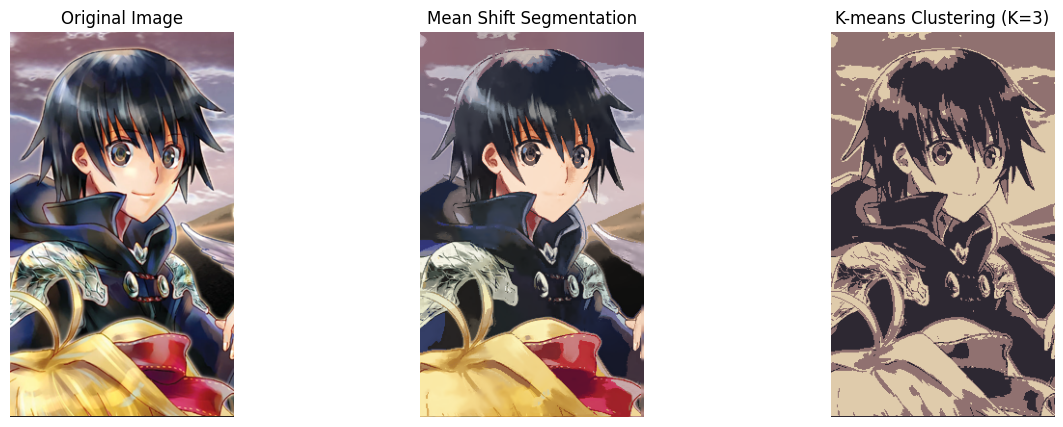

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/sato.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mean_shift = cv2.pyrMeanShiftFiltering(image, sp=20, sr=40)
pixel_values = image.reshape((-1, 3)).astype(np.float32)

K = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_image = centers[labels.flatten()].reshape(image.shape)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(mean_shift)
ax[1].set_title("Mean Shift Segmentation")
ax[1].axis("off")

ax[2].imshow(segmented_image)
ax[2].set_title(f"K-means Clustering (K={K})")
ax[2].axis("off")

plt.show()


In [ ]:
import time

start_time = time.time()
mean_shift = cv2.pyrMeanShiftFiltering(image, sp=20, sr=40)
mean_shift_time = time.time() - start_time

start_time = time.time()
_, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_image = centers[labels.flatten()].reshape(image.shape)
kmeans_time = time.time() - start_time

print(f"Mean Shift Execution Time: {mean_shift_time:.4f} seconds")
print(f"K-means Execution Time: {kmeans_time:.4f} seconds")


Mean Shift Execution Time: 1.8736 seconds
K-means Execution Time: 0.5820 seconds
